In [1]:
import pandas as pd
import stumpy
df = pd.read_csv("EURUSD_Candlestick_1_D_ASK_05.05.2003-19.10.2019.csv")
df.tail()


,Local time,open,high,low,close,volume
4322,14.10.2019 00:00:00.000 GMT+0300,1.10399,1.10428,1.10129,1.10281,150329.9600
4323,15.10.2019 00:00:00.000 GMT+0300,1.10281,1.10463,1.09915,1.10338,225114.4925
4324,16.10.2019 00:00:00.000 GMT+0300,1.10331,1.10857,1.10226,1.10720,224179.4392
4325,17.10.2019 00:00:00.000 GMT+0300,1.10724,1.11400,1.10653,1.11254,221922.6500
4326,18.10.2019 00:00:00.000 GMT+0300,1.11256,1.11727,1.11149,1.11723,143073.7750


In [56]:
x = df.iloc[:100].copy()




In [57]:
type(x)

pandas.core.frame.DataFrame

In [58]:
x.columns

Index(['Local time', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

In [59]:
x.head()

,Local time,open,high,low,close,volume
0,05.05.2003 00:00:00.000 GMT+0300,1.12354,1.13019,1.12030,1.12804,1053162.797
1,06.05.2003 00:00:00.000 GMT+0300,1.12798,1.14510,1.12738,1.14368,1061122.699
2,07.05.2003 00:00:00.000 GMT+0300,1.14367,1.14448,1.13275,1.13677,1056796.590
3,08.05.2003 00:00:00.000 GMT+0300,1.13675,1.15092,1.13026,1.15026,1058908.699
4,09.05.2003 00:00:00.000 GMT+0300,1.15002,1.15376,1.14362,1.14907,1063989.000


In [60]:
import numpy as np
x['date'] = x.index


dt =np.dtype(x['close'])
dt

dtype('float64')

# Stumpy

In [73]:
plt.plot(x['close'], color='black')
plt.xlim(0, x.shape[0]+12)
color = itertools.cycle(['white', 'gainsboro'])
for i, x in enumerate(range(0, x.shape[0], 52)):
    plt.text(x+12, 0.9, str(2004+i), color="black", fontsize=20)
    rect = Rectangle((x, -1), 52, 2.5, facecolor=next(color))
    plt.gca().add_patch(rect)
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [68]:
m = 5

mp = stumpy.stump(x['close'], m)

In [84]:
all_chain_set, unanchored_chain = stumpy.allc(mp[:, 2], mp[:, 3])
len(unanchored_chain)

4

In [88]:
import itertools
# plt.plot(x['close'], linewidth=1, color='black')
for i in range(len(unanchored_chain)):
    y = x['close'].iloc[unanchored_chain[i]:unanchored_chain[i]+m]
    x = y.index.values
    
    # plt.plot(x, y, linewidth=3)
# color = itertools.cycle(['white', 'gainsboro'])
# for i, x in enumerate(range(0, x.shape[0], 52)):
#     plt.text(x+12, 0.9, str(2004+i), color="black", fontsize=20)
#     rect = Rectangle((x, -1), 52, 2.5, facecolor=next(color))
#     plt.gca().add_patch(rect)
# plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [62]:
mp.shape

(81, 4)

In [63]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.dates as dates
type(mp)

numpy.ndarray

In [64]:
mp = mp.astype(np.float32)

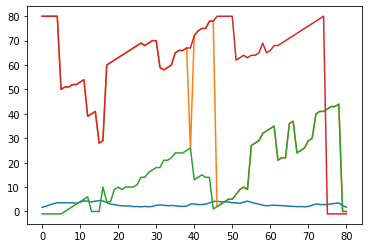

In [65]:
# plt.imshow(mp)
for i in range(mp.shape[1]):
    plt.plot(mp[:,i])

In [66]:
motif_idx = np.argsort(mp[:, 0])[0]
nearest_neighbor_idx = mp[motif_idx, 1]

print(f"The nearest neighbor is located at index {motif_idx}")
print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 0
The nearest neighbor is located at index 80.0


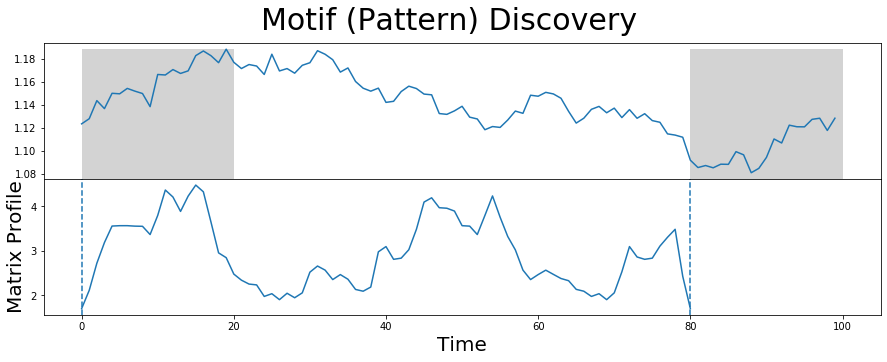

In [67]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize = (15,5))
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(x['open'].values)
# axs[0].set_ylabel('Steam Flow', fontsize='20')
height = x['open'].max()
rect = Rectangle((motif_idx, 0), m, height, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, height, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()



125 42.0


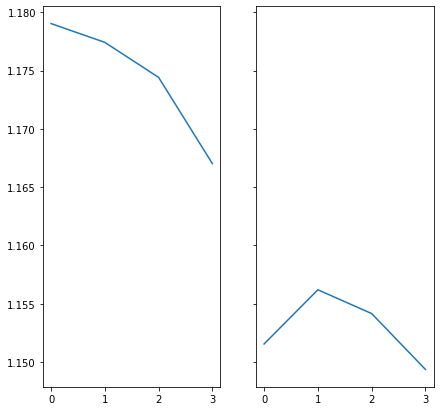

In [30]:
fig, ax = plt.subplots(1,2, figsize = (7,7), sharey=True)

values = x['open'].to_numpy()
print(motif_idx,nearest_neighbor_idx )
nearest_neighbor_idx = nearest_neighbor_idx.astype(np.int32)
y1 = values[motif_idx:motif_idx+m]
y2 = values[nearest_neighbor_idx:nearest_neighbor_idx+m]
ax[0].plot(y1)
ax[1].plot(y2)

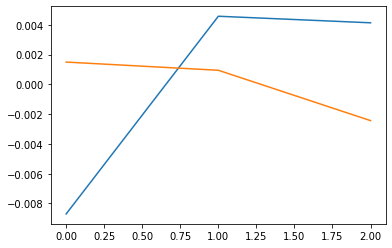

In [22]:
y1_norm = y1 - y1.mean()
y2_norm = y2 - y2.mean()

plt.plot(y1_norm, label = 'y1')
plt.plot(y2_norm, label = 'y2')